# **Analyzing COVID-19 Data for Italy**

In this notebook, we'll analyze COVID-19 data for Italy using a dataset named 'italy-covid-daywise.csv'. Let's start by loading the dataset and exploring its contents.

## Loading the Dataset

We begin by importing the necessary libraries and loading the dataset into a DataFrame.


# **Exploring the Dataset**

### Displaying the First Few Rows

Let's start by displaying the first few rows of the DataFrame to get an overview of the data.


In [3]:
import pandas as pd
path1 = 'https://raw.githubusercontent.com/Arhaan-P/italy-covid-daywise-data-analysis/main/italy-covid-daywise.csv?token=GHSAT0AAAAAACOCR7HVRUPKHKXVZ7WWAVDGZPJRDFA'
covid_df = pd.read_csv(path1)

##Dataset Information

Next, let's examine the information about the DataFrame, including data types and null values.

In [131]:
# Displaying the first few rows of the DataFrame
print(covid_df.head(),"\n")

         date  new_cases  new_deaths  new_tests
0  2019-12-31        0.0         0.0        NaN
1  2020-01-01        0.0         0.0        NaN
2  2020-01-02        0.0         0.0        NaN
3  2020-01-03        0.0         0.0        NaN
4  2020-01-04        0.0         0.0        NaN 



##Summary Statistics

We'll compute summary statistics of numerical columns to gain insights into the distribution of the data.

In [132]:
# Displaying information about the DataFrame, including data types and null values
print(covid_df.info(),"\n")

#Dtype of date is 'object' which means Pandas does not recognize it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None 



In [133]:
# Displaying summary statistics of numerical columns
print(covid_df.describe(),"\n")

         new_cases  new_deaths     new_tests
count   248.000000  248.000000    135.000000
mean   1094.818548  143.133065  31699.674074
std    1554.508002  227.105538  11622.209757
min    -148.000000  -31.000000   7841.000000
25%     123.000000    3.000000  25259.000000
50%     342.000000   17.000000  29545.000000
75%    1371.750000  175.250000  37711.000000
max    6557.000000  971.000000  95273.000000 



In [134]:
# Displaying column names
print(covid_df.columns,"\n")

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object') 



##Accessing Specific Values

We can access specific values in the DataFrame. For example, let's access a value in the 'new_cases' column at index 246.


In [135]:
# Accessing a specific value in the 'new_cases' column
print(covid_df['new_cases'][246],"\n")

975.0 



##Finding the First Non-Null Value

We'll find the index of the first non-null value in the 'new_tests' column.

In [136]:
# Finding the first index that doesn't contain a NaN value in the 'new_tests' column
print(covid_df.new_tests.first_valid_index(),"\n")

111 



##Calculating Total Cases, Total Deaths and Death Rate
We'll calculate the death rate in Italy based on the reported cases and deaths.

In [137]:

# Calculating total reported cases and deaths
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

print(f"Number of reported cases: {total_cases} and reported deaths: {total_deaths}\n")

# Calculating the death rate
death_rate = total_deaths / total_cases

print(f"Death rate in Italy: {death_rate:.2f}\n")


Number of reported cases: 271515.0 and reported deaths: 35497.0

Death rate in Italy: 0.13



# **Querying and Sorting COVID-19 Data**

In this section, we'll perform various queries and sorting operations on the COVID-19 dataset for Italy.

## Days with More than 1000 Reported Cases

We start by identifying the days with more than 1000 reported cases.
*italicized text*

In [138]:
# Querying and Sorting COVID-19 Data

## Days with More than 1000 Reported Cases

high_new_cases = covid_df.new_cases > 1000
print(f"Greater than 1000 cases: \n {high_new_cases}\n")

# Retaining the rows which have new cases > 1000
print(f"DataFrame for the condition: \n {covid_df[high_new_cases]}\n")


Greater than 1000 cases: 
 0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

DataFrame for the condition: 
            date  new_cases  new_deaths  new_tests
68   2020-03-08     1247.0        36.0        NaN
69   2020-03-09     1492.0       133.0        NaN
70   2020-03-10     1797.0        98.0        NaN
72   2020-03-12     2313.0       196.0        NaN
73   2020-03-13     2651.0       189.0        NaN
..          ...        ...         ...        ...
241  2020-08-28     1409.0         5.0    65135.0
242  2020-08-29     1460.0         9.0    64294.0
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
247  2020-09-03     1326.0         6.0        NaN

[72 rows x 4 columns]



##Overall Number of Tests Conducted and Positive Rate
Next, let's determine the overall number of tests conducted and calculate the positive rate. (Given intitial tests = 935310)


In [139]:
total_cases = covid_df.new_cases.sum()
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
positive_rate = total_cases / total_tests
print('\n{:.2f}% of tests in Italy led to a positive diagnosis.\n'.format(positive_rate*100))


5.21% of tests in Italy led to a positive diagnosis.



##Days with Higher Cases than the Positive Rate
We'll identify the days when the ratio of cases reported to tests conducted is higher than the overall positive rate.

In [140]:
high_ratio_df = covid_df[(covid_df.new_cases / covid_df.new_tests) > positive_rate]
print(f"Days which had higher cases than the positive rate: \n {high_ratio_df}\n")

Days which had higher cases than the positive rate: 
            date  new_cases  new_deaths  new_tests
111  2020-04-20     3047.0       433.0     7841.0
112  2020-04-21     2256.0       454.0    28095.0
113  2020-04-22     2729.0       534.0    44248.0
114  2020-04-23     3370.0       437.0    37083.0
116  2020-04-25     3021.0       420.0    38676.0
117  2020-04-26     2357.0       415.0    24113.0
118  2020-04-27     2324.0       260.0    26678.0
120  2020-04-29     2091.0       382.0    38589.0
123  2020-05-02     1965.0       269.0    31231.0
124  2020-05-03     1900.0       474.0    27047.0
125  2020-05-04     1389.0       174.0    22999.0
128  2020-05-07     1444.0       369.0    13665.0



##Top Days with Most Cases and Deaths
We identify the top ten days with the most number of cases and deaths.

In [141]:
print(f"Top ten days with most number of cases: \n{covid_df.sort_values('new_cases',ascending=False).head(10)}\n")
print(f"Top ten days with most deaths: \n{covid_df.sort_values('new_deaths',ascending=False).head(10)}\n")

Top ten days with most number of cases: 
          date  new_cases  new_deaths  new_tests
82  2020-03-22     6557.0       795.0        NaN
87  2020-03-27     6153.0       660.0        NaN
81  2020-03-21     5986.0       625.0        NaN
89  2020-03-29     5974.0       887.0        NaN
88  2020-03-28     5959.0       971.0        NaN
83  2020-03-23     5560.0       649.0        NaN
80  2020-03-20     5322.0       429.0        NaN
85  2020-03-25     5249.0       743.0        NaN
90  2020-03-30     5217.0       758.0        NaN
86  2020-03-26     5210.0       685.0        NaN

Top ten days with most deaths: 
          date  new_cases  new_deaths  new_tests
88  2020-03-28     5959.0       971.0        NaN
89  2020-03-29     5974.0       887.0        NaN
92  2020-04-01     4053.0       839.0        NaN
91  2020-03-31     4050.0       810.0        NaN
82  2020-03-22     6557.0       795.0        NaN
95  2020-04-04     4585.0       764.0        NaN
94  2020-04-03     4668.0       760.0       

##Days with the Least Number of Cases
We examine the top ten days with the least number of cases.

In [142]:
print(f"Top 10 days with least number of cases: \n {covid_df.sort_values('new_cases').head(10)}\n")

Top 10 days with least number of cases: 
            date  new_cases  new_deaths  new_tests
172  2020-06-20     -148.0        47.0    29875.0
0    2019-12-31        0.0         0.0        NaN
29   2020-01-29        0.0         0.0        NaN
30   2020-01-30        0.0         0.0        NaN
32   2020-02-01        0.0         0.0        NaN
33   2020-02-02        0.0         0.0        NaN
34   2020-02-03        0.0         0.0        NaN
36   2020-02-05        0.0         0.0        NaN
37   2020-02-06        0.0         0.0        NaN
38   2020-02-07        0.0         0.0        NaN



# **Handling the Data Entry Error**
To address the data entry error, we have several approaches:

**Replace with 0:** We could replace the negative value with 0, assuming that no new cases were reported on that day.

**Replace with Column Mean:** Alternatively, we could replace the negative value with the mean of the entire 'new_cases' column.

**Replace with Mean of Surrounding Values:** Since the data is ordered by date, we can replace the negative value with the average of the values on the previous and next dates.

**Discard the Row:** If the data entry error cannot be reliably corrected, we may consider discarding the entire row.

For this scenario, we'll proceed with the third approach, replacing the negative value with the average of the values on the previous and next dates. We'll use the .at method to modify the specific value within the DataFrame.

This approach maintains the chronological order of the data and ensures smooth continuity in the time series.

In [143]:
#It seems like the count of new cases on Jun 20, 2020, was `-148`, a negative number
#Let's look at some days before and after Jun 20, 2020.
print(f"Reviewing: \n {covid_df.loc[169:175]} \n")

Reviewing: 
            date  new_cases  new_deaths  new_tests
169  2020-06-17      210.0        34.0    33957.0
170  2020-06-18      328.0        43.0    32921.0
171  2020-06-19      331.0        66.0    28570.0
172  2020-06-20     -148.0        47.0    29875.0
173  2020-06-21      264.0        49.0    24581.0
174  2020-06-22      224.0        24.0    16152.0
175  2020-06-23      221.0        23.0    23225.0 



In [144]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases']) / 2

print(f"After replacing with mean: \n{covid_df.loc[169:175]}\n")

After replacing with mean: 
           date  new_cases  new_deaths  new_tests
169  2020-06-17      210.0        34.0    33957.0
170  2020-06-18      328.0        43.0    32921.0
171  2020-06-19      331.0        66.0    28570.0
172  2020-06-20      297.5        47.0    29875.0
173  2020-06-21      264.0        49.0    24581.0
174  2020-06-22      224.0        24.0    16152.0
175  2020-06-23      221.0        23.0    23225.0



# **Dealing with Object Datatype and Working with Dates**

In this section, we'll explore how to work with dates in our COVID-19 dataset for Italy.

## Converting Data Type of 'date' Column

The data type of the 'date' column is currently `object`, which means Pandas does not recognize it as a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

#Extracting Date Components
We can extract different parts of the date into separate columns, such as year, month, day, and weekday, using the` DatetimeIndex` class.


In [145]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [146]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
print(f"Grouping by month: \n {covid_month_df}\n")

Grouping by month: 
        new_cases  new_deaths  new_tests
month                                  
1            3.0         0.0        0.0
2          885.0        21.0        0.0
3       100851.0     11570.0        0.0
4       101852.0     16091.0   419591.0
5        29073.0      5658.0  1078720.0
6         8217.5      1404.0   830354.0
7         6722.0       388.0   797692.0
8        21060.0       345.0  1098704.0
9         3297.0        20.0    54395.0
12           0.0         0.0        0.0



##Analyzing Data by Month
We'll focus on analyzing the data on a month-by-month basis. Let's query the rows for May and calculate the total number of new cases, deaths, and tests for that month.

In [147]:
# Query the rows for May

covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated

covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

print(f"Total data for May: \n {covid_may_totals}\n")

Total data for May: 
 new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64



##Comparing Cases Reported on Sundays
We'll check if the number of cases reported on Sundays is higher than the average number of cases reported every day.

In [148]:
mean_cases = covid_df.new_cases.mean()
mean_sunday = covid_df[covid_df.weekday == 6].new_cases.mean()

print(f"Mean cases: {mean_cases}")
print(f"Mean cases on Sunday: {mean_sunday}\n")

# It seems like more cases were reported on Sundays compared to other days.

Mean cases: 1096.6149193548388
Mean cases on Sunday: 1247.2571428571428



# **Aggregating COVID-19 Data by Month and Computing Cumulative Totals**

In this section, we'll aggregate COVID-19 data by month and compute cumulative totals for cases, deaths, and tests.

## Grouping Data by Month

We start by grouping the data by month and summing the values of new cases, new deaths, and new tests for each month.
##Computing Cumulative Totals
We compute the cumulative totals of cases, deaths, and tests up to each date using the cumsum method.

In [149]:
initial_tests = 935310
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

#Three new columns are added to the DataFrame: 'total_cases', 'total_deaths', and 'total_tests', representing the cumulative sum of cases, deaths, and tests respectively.

print(f"Adding total cases, total deaths and total tests: \n {covid_df}")

Adding total cases, total deaths and total tests: 
            date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0    2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1    2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2    2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3    2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4    2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..          ...        ...         ...        ...   ...    ...  ...      ...   
243  2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244  2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245  2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246  2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247  2020-09-03     1326.0         6.0        NaN  2020      9    3 

# **Merging Data from Other Sources**

In this section, we'll merge COVID-19 data with additional location data from another source and perform analysis on the merged dataset.

## Finding Italy in Additional Location Data

We start by loading an additional dataset containing location information and identifying Italy within it.

##Merging DataFrames
To merge the COVID-19 data with the location data, we first add a 'location' column to the 'covid_df' DataFrame with all values set to "Italy". Then, we merge the two DataFrames on the common column 'location'.

In [150]:
path2 = 'https://raw.githubusercontent.com/Arhaan-P/italy-covid-daywise-data-analysis/main/locations.csv?token=GHSAT0AAAAAACOCR7HUXMQAMRDKJVZFM7UAZPJRELQ'
locations_df = pd.read_csv(path2)

In [151]:
#Finding Italy

print(f"Italy: \n\n {locations_df[locations_df.location == 'Italy']} \n")

#We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a location column in the covid_df dataframe with all values set to "Italy".

covid_df['location'] = 'Italy'

# Merge the two DataFrames on the 'key' column using df1.merge(df2, on="key")
#merged_df = df1.merge(df2, on="key")

merged_df = covid_df.merge(locations_df, on="location")

print(f"Merged dataframe: \n\n {merged_df}\n")

Italy: 

    location continent  population  life_expectancy  \
97    Italy    Europe  60461828.0            83.51   

    hospital_beds_per_thousand  gdp_per_capita  
97                        3.18       35220.084   

Merged dataframe: 

            date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0    2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1    2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2    2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3    2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4    2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..          ...        ...         ...        ...   ...    ...  ...      ...   
243  2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244  2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245  2020-09-01      996.0         6.0  

##Calculating Metrics per Million
We compute metrics like cases per million, deaths per million, and tests per million using the merged data.

In [152]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

print(f"With the new metrics: \n {merged_df}\n")

With the new metrics: 
            date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0    2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1    2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2    2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3    2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4    2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..          ...        ...         ...        ...   ...    ...  ...      ...   
243  2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244  2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245  2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246  2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247  2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     total_case

##Writing Results to a File
We extract the relevant columns from the merged DataFrame and write the data to a CSV file using the `to_csv` function.

In [153]:
#After completing your analysis and adding new columns, we should write the results back to a file.
#First, we will create a data frame containing just the columns we wish to record.

result_df = merged_df[['date',
                       'new_cases',
                       'total_cases',
                       'new_deaths',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

print(f"Final resultant data frame: \n {result_df}\n")

#To write the data from the data frame into a file, we can use the `to_csv` function.
result_df.to_csv('/content/drive/My Drive/result.csv', index=None)


Final resultant data frame: 
            date  new_cases  total_cases  new_deaths  total_deaths  new_tests  \
0    2019-12-31        0.0          0.0         0.0           0.0        NaN   
1    2020-01-01        0.0          0.0         0.0           0.0        NaN   
2    2020-01-02        0.0          0.0         0.0           0.0        NaN   
3    2020-01-03        0.0          0.0         0.0           0.0        NaN   
4    2020-01-04        0.0          0.0         0.0           0.0        NaN   
..          ...        ...          ...         ...           ...        ...   
243  2020-08-30     1444.0     267298.5         1.0       35473.0    53541.0   
244  2020-08-31     1365.0     268663.5         4.0       35477.0    42583.0   
245  2020-09-01      996.0     269659.5         6.0       35483.0    54395.0   
246  2020-09-02      975.0     270634.5         8.0       35491.0        NaN   
247  2020-09-03     1326.0     271960.5         6.0       35497.0        NaN   

     tota

# **Visual Analysis: Plotting Graphs**

In this section, we'll plot various graphs to visually analyze the COVID-19 data trends over time and by month.

## Daily Cases Over Time

We start by plotting the daily cases over time to observe the overall trend.



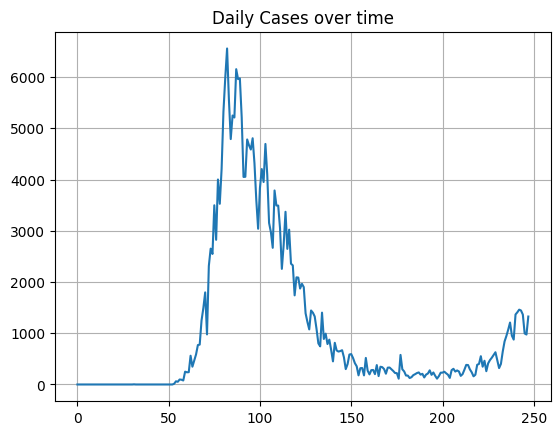

In [154]:
import matplotlib.pyplot as plt
plt.plot(result_df.index, result_df['new_cases'])
plt.grid(True)
plt.title('Daily Cases over time')
plt.show()

In [155]:
#While this plot provides an overview of the trend, it's challenging to identify specific dates due to the lack of date labels on the x-axis.
#To address this, we set the 'date' column as the index for the DataFrame.

result_df.set_index('date', inplace=True)
print(f"\n{result_df}\n")


            new_cases  total_cases  new_deaths  total_deaths  new_tests  \
date                                                                      
2019-12-31        0.0          0.0         0.0           0.0        NaN   
2020-01-01        0.0          0.0         0.0           0.0        NaN   
2020-01-02        0.0          0.0         0.0           0.0        NaN   
2020-01-03        0.0          0.0         0.0           0.0        NaN   
2020-01-04        0.0          0.0         0.0           0.0        NaN   
...               ...          ...         ...           ...        ...   
2020-08-30     1444.0     267298.5         1.0       35473.0    53541.0   
2020-08-31     1365.0     268663.5         4.0       35477.0    42583.0   
2020-09-01      996.0     269659.5         6.0       35483.0    54395.0   
2020-09-02      975.0     270634.5         8.0       35491.0        NaN   
2020-09-03     1326.0     271960.5         6.0       35497.0        NaN   

            total_tests

##New Cases and New Deaths Over Time
Next, we plot the new cases and new deaths per day as line graphs to observe their trends over time.

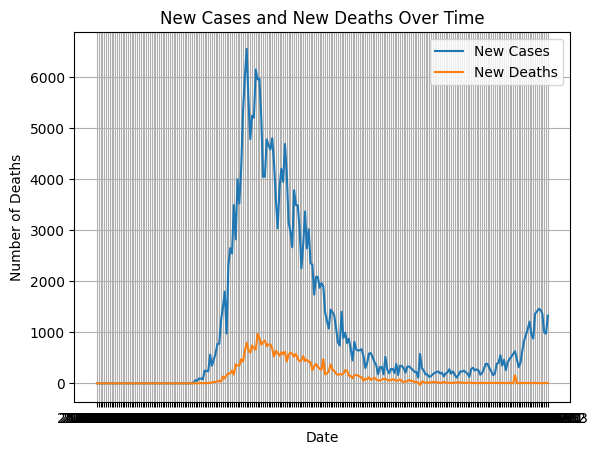

In [156]:
#Let's plot the new cases & new deaths per day as line graphs.

# Plot new cases

plt.plot(result_df.index, result_df['new_cases'], label='New Cases')

# Plot new deaths

plt.plot(result_df.index, result_df['new_deaths'], label='New Deaths')

# Labeling the axes and adding a title

plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('New Cases and New Deaths Over Time')

# Adding a legend

plt.legend()

# Display the plot
plt.grid(True)
plt.show()


##Total Cases vs. Total Deaths Over Time
We also compare the total number of cases and total number of deaths over time.

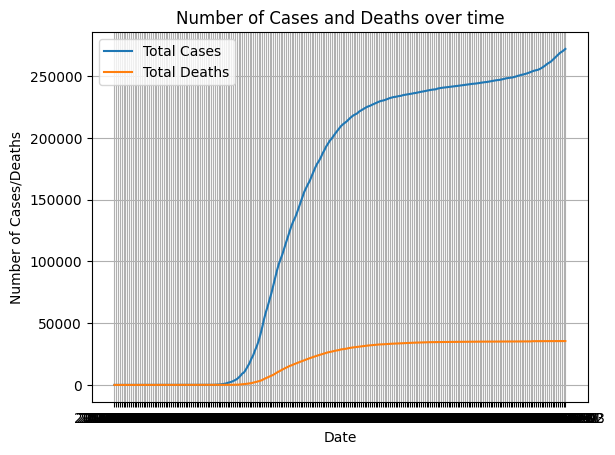

In [157]:
# Plot total cases

plt.plot(result_df.index, result_df['total_cases'], label='Total Cases')

# Plot total deaths

plt.plot(result_df.index, result_df['total_deaths'], label='Total Deaths')

# Labeling the axes and adding a title

plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
plt.title('Number of Cases and Deaths over time')

# Adding a legend

plt.legend()

# Display the plot

plt.grid(True)
plt.show()

##Death Rate Over Time
We calculate and plot the death rate over time to understand its variation.

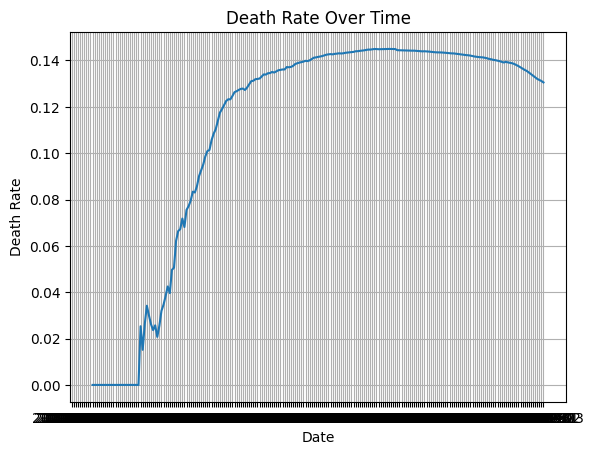

In [158]:
# Calculate death rate

death_rate = (result_df['total_deaths']/ result_df['total_cases'])

# Plot death rate over time

plt.plot(result_df.index, death_rate)
plt.title('Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

##Positive Rate Over Time
Similarly, we calculate and plot the positive testing rate over time.

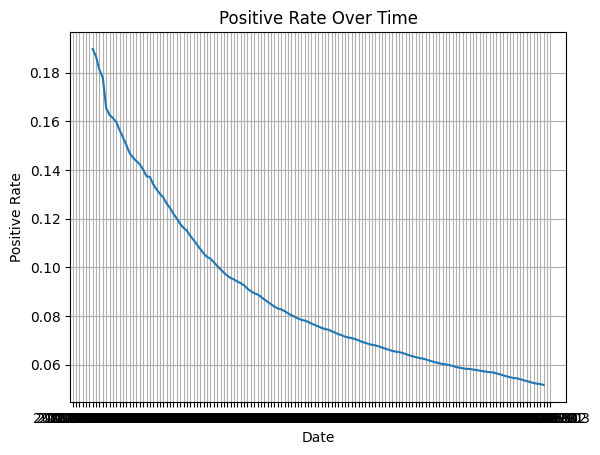

In [159]:
# Calculate positive rate

positive_rates = result_df['total_cases'] / result_df['total_tests']

# Plot positive rate

plt.plot(result_df.index, positive_rates)
plt.title('Positive Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.grid(True)
plt.show()

##Month-Wise Analysis
Finally, we visualize month-wise data using bar charts to observe trends at a higher level.

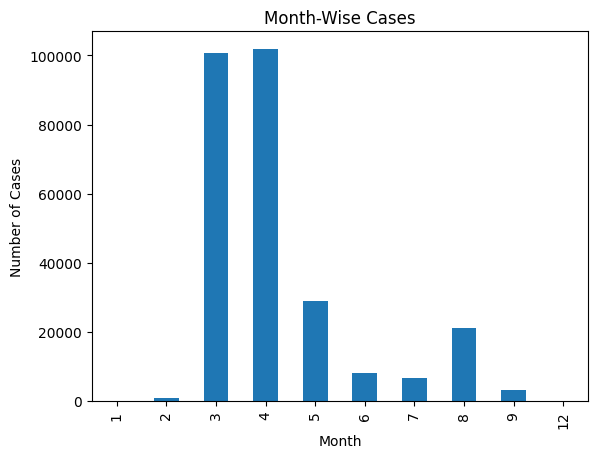

In [160]:
covid_month_df.new_cases.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Month-Wise Cases')
plt.show()

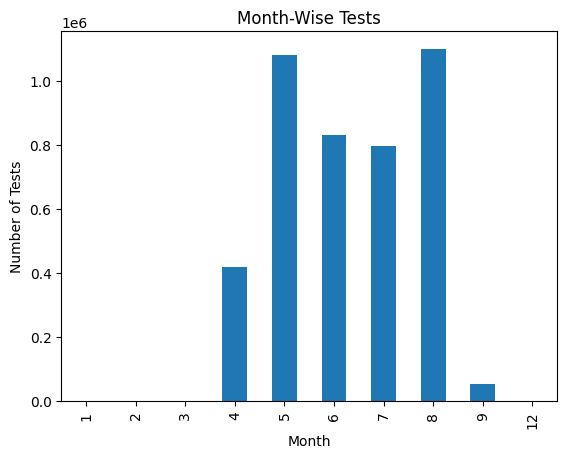

In [161]:
#Tests

covid_month_df.new_tests.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Tests')
plt.title('Month-Wise Tests')
plt.show()